In [9]:
# importing needed libraries 
import numpy as np
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline
from IPython import display 
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

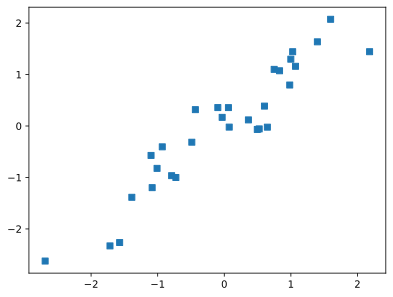

In [10]:
# creating the data 
N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

# plotting 
plt.plot(x,y,'s')
plt.show()

In [11]:
# building the model
regressionANN = nn.Sequential(
    nn.Linear(1,1), # input layer 
    nn.ReLU(),      # activation layer
    nn.Linear(1,1)  # output layer
)

regressionANN

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [12]:
# Setting up some metaparameters
# learning rate 
learningRate = .05

# loss function 
lossFunction = nn.MSELoss()

# optimizer -- the flavor or type of gradient descent to use
optimizer = torch.optim.SGD(regressionANN.parameters(),lr=learningRate)

In [13]:
# training the model 
numEpochs = 500
losses = torch.zeros(numEpochs)

# Training time
for epoch in range(numEpochs):

    # forward pass
    yHat = regressionANN(x)

    # compute loss
    loss = lossFunction(yHat,y)
    losses[epoch] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

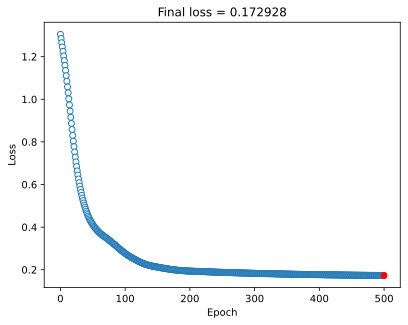

In [14]:
# displaying the losses via manual computation
# final forward pass
predictions = regressionANN(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numEpochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' % testloss.item())
plt.show()

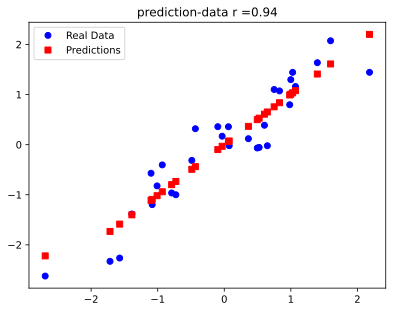

In [15]:
# plotting the data
plt.plot(x,y,'bo',label='Real Data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r ={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()